In [11]:
## Mounted Co-Lab to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
## Get Dir

!ls "/content/drive/My Drive/image"

dataset.zip


In [13]:
## unzip file and create temp. dir @ /content/dataset

!unzip "/content/drive/My Drive/image/dataset.zip" -d "/content/dataset"

Archive:  /content/drive/My Drive/image/dataset.zip
 extracting: /content/dataset/00753.png  
 extracting: /content/dataset/00756.png  
  inflating: /content/dataset/00759.png  
 extracting: /content/dataset/00751.png  
  inflating: /content/dataset/00754.png  
 extracting: /content/dataset/00755.png  
  inflating: /content/dataset/00757.png  
 extracting: /content/dataset/00758.png  
  inflating: /content/dataset/00760.png  
  inflating: /content/dataset/00761.png  
  inflating: /content/dataset/00762.png  
 extracting: /content/dataset/00763.png  
  inflating: /content/dataset/00764.png  
  inflating: /content/dataset/00765.png  
  inflating: /content/dataset/00766.png  
  inflating: /content/dataset/00767.png  
  inflating: /content/dataset/00768.png  
  inflating: /content/dataset/00769.png  
 extracting: /content/dataset/00770.png  
 extracting: /content/dataset/00771.png  
  inflating: /content/dataset/00773.png  
  inflating: /content/dataset/00774.png  
 extracting: /content/da

In [14]:
## set temp. dir to variable img_path
img_path = "/content/dataset"

In [15]:
## Install Pillow lib.
!pip install Pillow

Width: 128 pixels, Height: 128 pixels


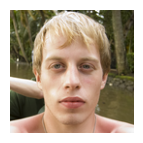

In [16]:
## print image from input folder
import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming img_path is already set to your image directory
sample_image = os.path.join(img_path, os.listdir(img_path)[1])  # This grabs the first image in the directory
img = Image.open(sample_image)

# Get image dimensions
width, height = img.size
print(f"Width: {width} pixels, Height: {height} pixels")

# Set the figure size to match the image dimensions
plt.figure(figsize=(width/80, height/80))  # This assumes 80 DPI, adjust as needed for your display

# Display the image
plt.imshow(img)
plt.axis('off')  # To hide axis values
plt.show()


In [17]:
## Downsample image into zip. file


from google.colab import drive
import os
from zipfile import ZipFile
from PIL import Image
import io

zip_path = "/content/drive/My Drive/image/dataset.zip"
extract_path = "/content/dataset"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

def downsample_image(input_path, factor=2):
    """
    Downsample an image by a given factor.

    Parameters:
    - input_path: Path to the input image.
    - factor: Factor by which to downsample. Default is 2.

    Returns:
    - Image object of the downsampled image.
    """
    # Open the image
    with Image.open(input_path) as img:
        # Calculate new dimensions
        width, height = img.size
        new_width = width // factor
        new_height = height // factor

        # Resize the image
        img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)

        return img_resized

# Create a new ZIP for the downsampled images
output_zip_path = "/content/drive/My Drive/Deep_Output2/downsampled_images.zip"
with ZipFile(output_zip_path, 'w') as output_zip:
    for root, _, files in os.walk(extract_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_image_path = os.path.join(root, file)
                img_resized = downsample_image(input_image_path, factor=4)
                # Save the downsampled image to the ZIP archive
                buffer = io.BytesIO()
                img_resized.save(buffer, format="JPEG")
                output_zip.writestr(file, buffer.getvalue())


<ipython-input-17-04e6d549736d>:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


In [18]:


# 2. Extract the ZIP of downsampled into folder
zip_path = "/content/drive/My Drive/Deep_Output2/downsampled_images.zip"
extract_path = "/content/extracted_images"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



Width: 32 pixels, Height: 32 pixels


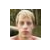

In [19]:
## print image from input folder

import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming img_path is already set to your image directory
sample_image = os.path.join(extract_path, os.listdir(extract_path)[1])  # This grabs the first image in the directory
img = Image.open(sample_image)

# Get image dimensions
width, height = img.size
print(f"Width: {width} pixels, Height: {height} pixels")

# Set the figure size to match the image dimensions
plt.figure(figsize=(width/80, height/80))  # This assumes 80 DPI, adjust as needed for your display

# Display the image
plt.imshow(img)
plt.axis('off')  # To hide axis values
plt.show()


In [11]:
'''# Necessary imports
from google.colab import drive
from PIL import Image
import os
import numpy as np



# Define your paths in Google Drive
hr_path = "/content/dataset"
lr_path = "/content/extracted_images"

def load_images_in_pair(hr_path, lr_path, hr_size=(128,128), lr_size=(64,64)):
    hr_images = []
    lr_images = []

    hr_filenames = sorted(os.listdir(hr_path))
    lr_filenames = sorted(os.listdir(lr_path))

    for hr_file, lr_file in zip(hr_filenames, lr_filenames):
        # Ensure paired images have the same filename
        assert hr_file == lr_file, "Mismatched files: {} and {}".format(hr_file, lr_file)

        hr_img = Image.open(os.path.join(hr_path, hr_file))
        hr_img = hr_img.resize(hr_size)
        hr_images.append(np.array(hr_img))

        lr_img = Image.open(os.path.join(lr_path, lr_file))
        lr_img = lr_img.resize(lr_size)
        lr_images.append(np.array(lr_img))

    return np.array(hr_images), np.array(lr_images)

hr_images, lr_images = load_images_in_pair(hr_path, lr_path)


In [20]:
from google.colab import drive
from PIL import Image
import os
import numpy as np


def load_images_in_pair(hr_path, lr_path, hr_size=(128,128), lr_size=(64,64)):
    hr_images = []
    lr_images = []

    hr_filenames = sorted(os.listdir(hr_path))
    lr_filenames = sorted(os.listdir(lr_path))

    for hr_file, lr_file in zip(hr_filenames, lr_filenames):
        # Ensure paired images have the same filename
        assert hr_file == lr_file, "Mismatched files: {} and {}".format(hr_file, lr_file)

        hr_img = Image.open(os.path.join(hr_path, hr_file))
        hr_img = hr_img.resize(hr_size)
        hr_images.append(np.array(hr_img))

        lr_img = Image.open(os.path.join(lr_path, lr_file))
        lr_img = lr_img.resize(lr_size)
        lr_images.append(np.array(lr_img))

    return np.array(hr_images), np.array(lr_images)

# Assuming you've mounted your Google Drive and defined the paths
hr_path = "/content/dataset"
lr_path = "/content/extracted_images"
hr_images, lr_images = load_images_in_pair(hr_path, lr_path)

# Normalize the images
hr_images = hr_images / 255.0
lr_images = lr_images / 255.0


In [26]:
hr_images, lr_images

(array([[[[0.3254902 , 0.41960784, 0.39607843],
          [0.3254902 , 0.41568627, 0.39607843],
          [0.3254902 , 0.41568627, 0.39607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.99607843, 0.99607843, 1.        ]],
 
         [[0.33333333, 0.42352941, 0.39607843],
          [0.33333333, 0.41960784, 0.39607843],
          [0.33333333, 0.42352941, 0.39607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.3372549 , 0.42352941, 0.39607843],
          [0.3372549 , 0.42352941, 0.39215686],
          [0.34117647, 0.42352941, 0.39607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.39215686, 0.4       , 0.56470588],
          [0.31372

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, Add
from tensorflow.keras.models import Model

def residual_dense_block(input_tensor, filters=64, d=32):
    x1 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(input_tensor)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(x1)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(x2)
    x3 = Activation('relu')(x3)

    # Combining inputs
    x3 = Add()([x1, x2, x3])
    x3 = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(x3)

    return x3

def rrdb(input_tensor, filters=64, d=32):
    x = residual_dense_block(input_tensor, filters, d)
    x = residual_dense_block(x, filters, d)
    x = residual_dense_block(x, filters, d)

    # Residual connection
    x = Add()([x, input_tensor])

    return x

def build_esrgan(lr_shape=(64, 64, 3), num_rrdb=5):
    lr_input = Input(shape=lr_shape)

    # Initial conv layer
    x = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(lr_input)

    # Stacking multiple RRDBs
    for _ in range(num_rrdb):
        x = rrdb(x)

    # Upsampling
    x = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.UpSampling2D(size=(2, 2))(x)
    x = Activation('relu')(x)

    # Final output layer
    hr_output = Conv2D(filters=3, kernel_size=(3, 3), padding="same", activation='sigmoid')(x)

    model = Model(inputs=lr_input, outputs=hr_output)
    return model





In [22]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf

# Using VGG19 pretrained on imagenet for perceptual loss
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False

# Select a layer for perceptual loss (e.g., block5_conv4)
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=vgg.get_layer("block5_conv4").output)

def perceptual_loss(y_true, y_pred):
    return tf.keras.losses.MSE(feature_extractor(y_true), feature_extractor(y_pred))

In [28]:
# Assuming you've loaded and preprocessed your hr_images and lr_images
# ...

# Define your ESRGAN model
esrgan_model = build_esrgan()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9)
esrgan_model.compile(optimizer=optimizer, loss=perceptual_loss)

# Train the model
esrgan_model.fit(lr_images, hr_images, epochs=20, batch_size=32)


Epoch 1/20
8/8 [==============================] - 25s 450ms/step - loss: 0.0841
Epoch 2/20
8/8 [==============================] - 4s 441ms/step - loss: 0.0784
Epoch 3/20
8/8 [==============================] - 4s 441ms/step - loss: 0.0726
Epoch 4/20
8/8 [==============================] - 4s 444ms/step - loss: 0.0656
Epoch 5/20
8/8 [==============================] - 4s 448ms/step - loss: 0.0604
Epoch 6/20
8/8 [==============================] - 4s 448ms/step - loss: 0.0573
Epoch 7/20
8/8 [==============================] - 4s 450ms/step - loss: 0.0525
Epoch 8/20
8/8 [==============================] - 4s 451ms/step - loss: 0.0485
Epoch 9/20
8/8 [==============================] - 4s 458ms/step - loss: 0.0461
Epoch 10/20
8/8 [==============================] - 4s 456ms/step - loss: 0.0443
Epoch 11/20
8/8 [==============================] - 4s 459ms/step - loss: 0.0423
Epoch 12/20
8/8 [==============================] - 4s 461ms/step - loss: 0.0408
Epoch 13/20
8/8 [==============================]

In [ ]:
#Predict Resulted (ไว้ใช้ เทียบภาพ predicted)


from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    """Load and preprocess the image."""
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # normalize to [0, 1]
    return np.expand_dims(img_array, axis=0)  # expand to include batch dimension

def display_images(lr_image, sr_image):
    """Display the low-resolution and super-resolved images side by side."""
    fig, axarr = plt.subplots(1, 2, figsize=(12, 6))

    # Show low-resolution image
    axarr[0].imshow(lr_image[0])
    axarr[0].set_title('Low-resolution')
    axarr[0].axis('off')

    # Show super-resolved image
    axarr[1].imshow(sr_image[0])
    axarr[1].set_title('Super-resolved (ESRGAN output)')
    axarr[1].axis('off')

    plt.tight_layout()
    plt.show()

# Load and preprocess your specific image
image_path = "/path/to/your/low_resolution_image.jpg"
input_image = load_and_preprocess_image(image_path)

# Predict the super-resolved image using ESRGAN
output_image = esrgan_model.predict(input_image)

# Display the images
display_images(input_image, output_image)


In [ ]:
## prepare data แบบ paired ลองดู

def load_images_in_pair(hr_path, lr_path, hr_size=(128,128), lr_size=(64,64)):
    hr_images = []
    lr_images = []

    hr_filenames = sorted(os.listdir(hr_path))
    lr_filenames = sorted(os.listdir(lr_path))

    for hr_file, lr_file in zip(hr_filenames, lr_filenames):
        # Ensure paired images have the same filename
        assert hr_file == lr_file, "Mismatched files: {} and {}".format(hr_file, lr_file)

        hr_img = Image.open(os.path.join(hr_path, hr_file))
        hr_img = hr_img.resize(hr_size)
        hr_images.append(np.array(hr_img))

        lr_img = Image.open(os.path.join(lr_path, lr_file))
        lr_img = lr_img.resize(lr_size)
        lr_images.append(np.array(lr_img))

    return np.array(hr_images), np.array(lr_images)

hr_images, lr_images = load_images_in_pair(hr_path, lr_path)


In [ ]:
## Prepare Data Might work (เก็บไว้ก่อน)

# 1. Prepare Data
import os
import numpy as np
from PIL import Image
import tensorflow as tf


# Load images from the path
def load_images(path, size=(128,128)):
    images = []
    for img_name in os.listdir(path):
        img = Image.open(os.path.join(path, img_name))
        img = img.resize(size)
        images.append(np.array(img))
    return np.array(images)

# Paths
hr_path = "/content/dataset"
lr_path = "/content/extracted_images"

# Load High Resolution and Low Resolution images
hr_images = load_images(hr_path, size=(128,128))
lr_images = load_images(lr_path, size=(32,32))

# Normalize images
hr_images = hr_images / 255.0
lr_images = lr_images / 255.0



In [ ]:
hr_images

array([[[[0.48235294, 0.52156863, 0.49411765],
         [0.4627451 , 0.50980392, 0.47843137],
         [0.49019608, 0.50588235, 0.48235294],
         ...,
         [0.34901961, 0.23921569, 0.15294118],
         [0.32941176, 0.22745098, 0.14901961],
         [0.27058824, 0.16862745, 0.09411765]],

        [[0.4745098 , 0.50588235, 0.4745098 ],
         [0.47058824, 0.50980392, 0.47843137],
         [0.49411765, 0.51764706, 0.49019608],
         ...,
         [0.36862745, 0.25098039, 0.16862745],
         [0.30980392, 0.21960784, 0.12941176],
         [0.27058824, 0.18039216, 0.11764706]],

        [[0.49803922, 0.50980392, 0.48627451],
         [0.47058824, 0.50588235, 0.4745098 ],
         [0.48627451, 0.52156863, 0.49019608],
         ...,
         [0.34901961, 0.23921569, 0.15294118],
         [0.31764706, 0.20392157, 0.11372549],
         [0.28627451, 0.16862745, 0.12156863]],

        ...,

        [[0.87843137, 0.17647059, 0.21176471],
         [0.91764706, 0.24313725, 0.27058824]

In [ ]:
# 2. Define the ESRGAN Architecture (RRDB and the Generator)

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, Add
from tensorflow.keras.models import Model

def residual_dense_block(input_tensor, filters=64, d=32):
    x1 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(input_tensor)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(x1)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(filters=d, kernel_size=(3, 3), padding="same")(x2)
    x3 = Activation('relu')(x3)

    # Combining inputs
    x3 = Add()([x1, x2, x3])

    return x3


def rrdb(input_tensor, filters=64, d=32):
    x = residual_dense_block(input_tensor, filters, d)
    x = residual_dense_block(x, filters, d)
    x = residual_dense_block(x, filters, d)

    # Residual connection
    x = Add()([x, input_tensor])

    return x

def build_esrgan(lr_shape=(64, 64, 3), num_rrdb=5):
    lr_input = Input(shape=lr_shape)

    # Initial conv layer
    x = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(lr_input)

    # Stacking multiple RRDBs
    for _ in range(num_rrdb):
        x = rrdb(x)

    # Upsampling
    x = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.UpSampling2D(size=(2, 2))(x)
    x = Activation('relu')(x)

    # Final output layer
    hr_output = Conv2D(filters=3, kernel_size=(3, 3), padding="same", activation='sigmoid')(x)

    model = Model(inputs=lr_input, outputs=hr_output)
    return model


# Initialize ESRGAN model
esrgan_model = build_esrgan()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9)
esrgan_model.compile(optimizer=optimizer, loss=perceptual_loss)

# Training the model
esrgan_model.fit(lr_images, hr_images, epochs=100, batch_size=32)


ValueError: ignored

NameError: ignored

In [ ]:




# 3. Integrate VGG for Transfer Learning
from tensorflow.keras.applications import VGG19

# Using VGG19 pretrained on imagenet for perceptual loss
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(128,128,3))
vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False

# Select a layer for perceptual loss (e.g., block5_conv4)
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=vgg.get_layer("block5_conv4").output)

def perceptual_loss(y_true, y_pred):
    return tf.keras.losses.MSE(feature_extractor(y_true), feature_extractor(y_pred))

# 4. Training Loop

# Build the ESRGAN model
model = ESRGAN()  # Assuming you've named your model class 'ESRGAN'
model.compile(optimizer='adam', loss=perceptual_loss)

# Training
model.fit(lr_images, hr_images, epochs=100, batch_size=32)

# Below are not a part of the model

In [ ]:
## downsampling image onto google drive none zip file

''''
from google.colab import drive
import os
from zipfile import ZipFile
from PIL import Image



zip_path = "/content/drive/My Drive/image/dataset.zip"
extract_path = "/content/dataset"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

def downsample_image(input_path, output_path, factor=2):
    """
    Downsample an image by a given factor.

    Parameters:
    - input_path: Path to the input image.
    - output_path: Path to save the downsampled image.
    - factor: Factor by which to downsample. Default is 2.
    """
    # Open the image
    with Image.open(input_path) as img:
        # Calculate new dimensions
        width, height = img.size
        new_width = width // factor
        new_height = height // factor

        # Resize the image
        img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)

        # Save the downsampled image
        img_resized.save(output_path)

# 3. Downsample each image in the extracted dataset
output_directory = "/content/drive/My Drive/Deep_Output"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for root, _, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_directory, file)
            downsample_image(input_image_path, output_image_path, factor=4)''''




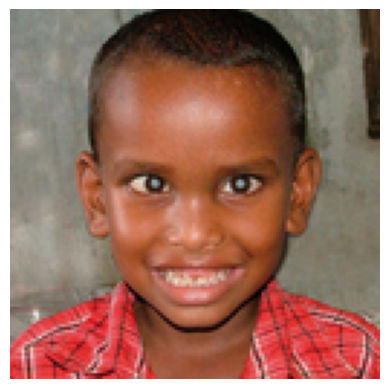

Width: 128 pixels, Height: 128 pixels


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming img_path is already set to your image directory
sample_image = os.path.join(img_path, os.listdir(img_path)[0])  # This grabs the first image in the directory
img = Image.open(sample_image)

# Display the image
plt.imshow(img)
plt.axis('off')  # To hide axis values
plt.show()

# Print the image dimensions
width, height = img.size
print(f"Width: {width} pixels, Height: {height} pixels")


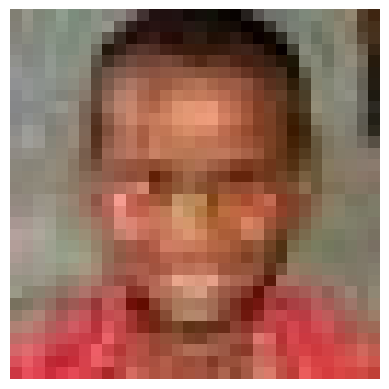

Width: 32 pixels, Height: 32 pixels


In [ ]:
## show image without actual size



import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming img_path is already set to your image directory
sample_image = os.path.join(extract_path, os.listdir(extract_path)[0])  # This grabs the first image in the directory
img = Image.open(sample_image)

# Display the image
plt.imshow(img)
plt.axis('off')  # To hide axis values
plt.show()

# Print the image dimensions
width, height = img.size
print(f"Width: {width} pixels, Height: {height} pixels")
